In [2]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn import preprocessing


from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df_5000_D1_H4_H1 = pd.read_csv('./sample5000_detailed_reports.csv')
df_5000_D1_H4_H1.head()


,Unnamed: 0,Pass,Profit,Total_trades,Profit_factor,Expected_Payoff,Drawdown_$,Drawdown_%,??,volume_1,volume_2,volume_3,pips2,pips3,pips1,hiddenAction,timeFrame,risk ratio
0,0,268997,4271.00,63,8.09,67.79,2111.40,2.10,0.0,7,1.0,1.0,18,14,1,0,1440,2.022828
1,1,183285,2184.80,63,5.04,34.68,1454.52,1.45,0.0,5,0.9,0.3,17,10,1,0,1440,1.502076
2,2,109256,1904.76,63,8.05,30.23,1618.74,1.62,0.0,6,0.6,0.3,6,7,1,0,1440,1.176693
3,3,85669,2706.16,63,11.74,42.95,2439.84,2.44,0.0,9,0.7,0.7,3,6,1,0,1440,1.109155
4,4,326453,2254.84,63,13.84,35.79,961.86,0.96,0.0,3,0.6,0.5,13,17,1,0,1440,2.344250


In [5]:
#split dataset in features and target variable
feature_cols = ["volume_1", "volume_2", "volume_3", "pips2","pips3", "timeFrame"]
X = df_5000_D1_H4_H1[feature_cols] # Features
y = df_5000_D1_H4_H1['risk ratio'] # Target variable

#digitize y
# y_enc = np.digitize(y, [0,1,2,3,4,5,6,7], right=True)

y_enc = round(y, 0)

# Split dataset into training set and test set
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.3, random_state=1)



In [6]:
# lab_enc = preprocessing.LabelEncoder()
# training_scores_encoded = lab_enc.fit_transform(y_train)

# y_tmp = y_train.to_numpy()
# y_tmp= np.reshape(y_tmp, (-1,1))

# lab_enc = KBinsDiscretizer(n_bins=7, encode='ordinal', strategy = 'uniform')
# y_train_enc = lab_enc.fit(y_tmp)
# y_train_enc = pd.Series(y_train_enc)

# if y_train <= 1:
#     y_train_enc = 1
# elif y_train<=2:
#     y_train_enc = 2
# elif y_train<=3:
#     y_train_enc = 3
# elif y_train<=4:
#     y_train_enc = 4
# elif y_train<=5:
#     y_train_enc = 5
# elif y_train<=6:
#     y_train_enc = 6
# else:
#     y_train_enc = 7
    
# def discretize(data, bins):
#     split = np.array_split(np.sort(data), bins)
#     cutoffs = [x[-1] for x in split]
#     cutoffs = cutoffs[:-1]
#     discrete = np.digitize(data, cutoffs, right=True)
#     return discrete, cutoffs

# y_train_enc, cutoff = discretize(y_train, 7)

# y_train_enc = pd.cut(y_train, [1,2,3,4,5,6,7])
# y_train_enc = pd.Series(y_train_enc)

#y_train_enc = np.digitize(y_train, [0,1,2,3,4], right=True)

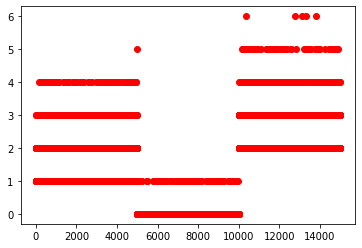

In [7]:
#sns.lineplot(data=spotify_data['Despacito'], label="Despacito")
# plt.plot(range(4500),y_test, 'ro')
plt.plot(y_train, 'ro')
# plt.plot(training_scores_encoded)
# plt.plot(y_test, 'r', '.')
plt.show()
# sns.scatterplot(x=y_pred, y=y_test)
# type(y_train_enc)


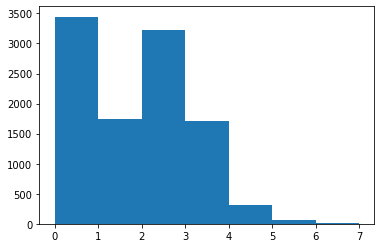

In [8]:
plt.hist(y_train, bins=[0,1,2,3,4,5,6,7])
# plt.ylabel('distribution of returns')
# plt.xlabel('intervals')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


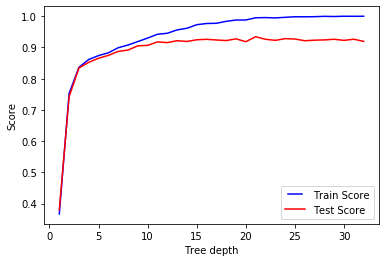

In [35]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    clf_2 = DecisionTreeRegressor(criterion='mae',max_depth=max_depth,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train Score')
line2, = plt.plot(max_depths, test_results, 'r', label='Test Score')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [34]:
train_results

[0.8752602771856102,
 0.857763142153157,
 0.853695542496166,
 0.8258679956364341,
 0.8279986430758103,
 0.8147628029221095,
 0.8083708606039808,
 0.8083708606039808,
 0.8083708606039808,
 0.8083708606039808]

In [10]:
test_results 

[0.38035359305758265,
 0.7421854877589702,
 0.8341665731060581,
 0.8511065468210307,
 0.8655203841048231,
 0.8726530046163905,
 0.8858780718149217,
 0.8901873633739936,
 0.9014063810536466,
 0.9097649207156396,
 0.909802069780804,
 0.9106564982795855,
 0.9182720566382903,
 0.9220984103502249,
 0.9195351248538803,
 0.9290081364708058,
 0.924624546781405,
 0.9260362112576527,
 0.9256275715408442,
 0.9268906397564343,
 0.9220984103502249,
 0.9268163416261054,
 0.9270763850822563,
 0.9234729257613081,
 0.9210582365256212,
 0.9221727084805537,
 0.9172318828136867,
 0.9258504659318306,
 0.9221355594153893,
 0.926147658453146,
 0.9201666589616754,
 0.9227299444580199]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

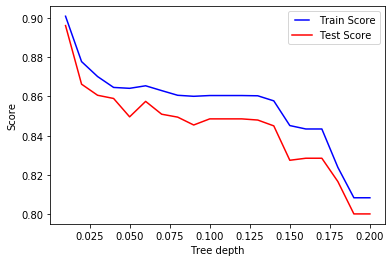

In [11]:
min_samples_splits = np.linspace(0.01, 0.2, 20, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
    clf_2 = DecisionTreeRegressor(criterion='mae',min_samples_split=min_samples_split,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)
    
line3, = plt.plot(min_samples_splits, train_results, 'b', label='Train Score')
line4, = plt.plot(min_samples_splits, test_results, 'r', label='Test Score')
plt.legend(handler_map={line3: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [36]:
train_results

[0.3670040152835,
 0.752586636736676,
 0.8364566677593946,
 0.8615079164405455,
 0.8740335407811208,
 0.8828789559082282,
 0.899149354536192,
 0.9078333569784982,
 0.918970832229783,
 0.9301728725549883,
 0.9423756715259612,
 0.9454747950741448,
 0.9562894449558271,
 0.9614869334064268,
 0.9728826689533935,
 0.976756573388623,
 0.9774345066647881,
 0.9837296013720361,
 0.9878940486399078,
 0.9879908962507885,
 0.9950930543820427,
 0.9957064225842873,
 0.994608816327639,
 0.9965457685452537,
 0.9983535906150275,
 0.9982244604671865,
 0.9986118509107095,
 0.9996771746303975,
 0.9991606540390336,
 1.0,
 0.9998063047782385,
 1.0]

In [37]:
test_results

[0.38035359305758265,
 0.7421854877589702,
 0.8341665731060581,
 0.8524439131669496,
 0.8655203841048231,
 0.87458475600494,
 0.8873640344214982,
 0.8917847731760634,
 0.9052698838307456,
 0.9067929955024865,
 0.9178634169214818,
 0.915560174881288,
 0.9217269196985808,
 0.919237932332565,
 0.9246616958465694,
 0.9261105093879816,
 0.9239558636084455,
 0.9221355594153893,
 0.9275593229293937,
 0.9184578019641123,
 0.9344318999848101,
 0.9262219565834747,
 0.9227299444580199,
 0.9283023042326819,
 0.9271135341474207,
 0.9215411743727586,
 0.9233986276309794,
 0.9242159070645964,
 0.9262962547138036,
 0.9227299444580199,
 0.9264448509744613,
 0.9194608267235516]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You 

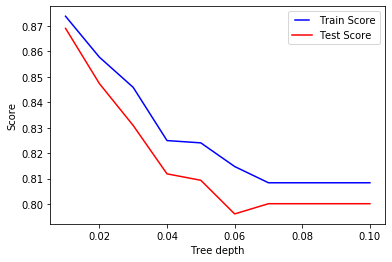

In [38]:
min_samples_leafs = np.linspace(0.01, 0.1, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    clf_2 = DecisionTreeRegressor(criterion='mae',min_samples_leaf=min_samples_leaf,presort=True)
    clf_2 = clf_2.fit(X_train,y_train)
    y_pred = clf_2.predict(X_train)
    tree_score=clf_2.score(X_train, y_train)
   # Add auc score to previous train results
    train_results.append(tree_score)   

    y_pred = clf_2.predict(X_test)
    tree_score=clf_2.score(X_test, y_test)
   # Add auc score to previous test results
    test_results.append(tree_score)

line5, = plt.plot(min_samples_leafs, train_results, 'b', label='Train Score')
line6, = plt.plot(min_samples_leafs, test_results, 'r', label='Test Score')
plt.legend(handler_map={line5: HandlerLine2D(numpoints=2)})
plt.ylabel('Score')
plt.xlabel('Tree depth')
plt.show()

In [39]:
train_results

[0.8738398455593593,
 0.857763142153157,
 0.8458831685517865,
 0.8249640846015471,
 0.8240601735666603,
 0.8147628029221095,
 0.8083708606039808,
 0.8083708606039808,
 0.8083708606039808,
 0.8083708606039808]

In [40]:
test_results

[0.8690866943606068,
 0.8473916403045894,
 0.8308974553715897,
 0.81187713400741,
 0.8093509975762299,
 0.7961259303776986,
 0.8001380294154553,
 0.8001380294154553,
 0.8001380294154553,
 0.8001380294154553]

In [41]:
# Create Decision Tree regressor object
clf_2 = DecisionTreeRegressor(criterion='mae',max_depth=6,min_samples_split=0.02,min_samples_leaf=0.02,presort=True)

# Train Decision Tree Classifer
clf_2 = clf_2.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf_2.predict(X_test)

tree_score=clf_2.score(X_test, y_test)
tree_score

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


0.8473916403045894

In [42]:
# pip install graphviz
# pip install pydotplus



dot_data = StringIO()
export_graphviz(clf_2, out_file='tree_limited.dot',  
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=["volume_1", "volume_2", "volume_3", "pips2","pips3", "timeFrame"],
                rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('Dyrvo.png')

!dot -Tpng tree_limited.dot -o tree_limited11.png -Gdpi=600

#Image(graph.create_png("C:/Users/Marin/Desktop/python/pic/tree_limited03.png"))

Image(filename = 'tree_limited22.png')



^
Expected {'graph' | 'digraph'}  (at char 0), (line:1, col:1)


'dot' is not recognized as an internal or external command,
operable program or batch file.


In [43]:
from sklearn.metrics import mean_absolute_error, r2_score

rsq = r2_score(y_test, y_pred)

maerr = mean_absolute_error(y_test, y_pred)

maerr


0.21844444444444444

In [44]:
rsq

0.8473916403045894

In [26]:
# Using those arrays, we can parse the tree structure:

n_nodes = clf_2.tree_.node_count
children_left = clf_2.tree_.children_left
children_right = clf_2.tree_.children_right
feature = clf_2.tree_.feature
threshold = clf_2.tree_.threshold


# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True

print("The binary tree structure has %s nodes and has "
      "the following tree structure:"
      % n_nodes)
for i in range(n_nodes):
    if is_leaves[i]:
        print("%snode=%s leaf node." % (node_depth[i] * "\t", i))
    else:
        #print("%snode=%s test node: go to node %s if X[:, %s] <= %s else to "
        #      "node %s."
        print("%snode=%s test node: go to node %s if %s <= %s else to "
              "node %s."
              % (node_depth[i] * "\t",
                 i,
                 children_left[i],
                 feature_cols[feature[i]],
                 threshold[i],
                 children_right[i],
                 ))
print()

# First let's retrieve the decision path of each sample. The decision_path
# method allows to retrieve the node indicator functions. A non zero element of
# indicator matrix at the position (i, j) indicates that the sample i goes
# through the node j.

node_indicator = clf_2.decision_path(X_test)

# Similarly, we can also have the leaves ids reached by each sample.

leave_id = clf_2.apply(X_test)

The binary tree structure has 49 nodes and has the following tree structure:
node=0 test node: go to node 1 if timeFrame <= 150.0 else to node 22.
	node=1 test node: go to node 2 if pips2 <= 11.5 else to node 11.
		node=2 test node: go to node 3 if volume_1 <= 2.5 else to node 4.
			node=3 leaf node.
			node=4 test node: go to node 5 if volume_2 <= 0.2500000074505806 else to node 6.
				node=5 leaf node.
				node=6 test node: go to node 7 if volume_3 <= 0.3500000089406967 else to node 8.
					node=7 leaf node.
					node=8 test node: go to node 9 if pips3 <= 10.5 else to node 10.
						node=9 leaf node.
						node=10 leaf node.
		node=11 test node: go to node 12 if volume_1 <= 2.5 else to node 13.
			node=12 leaf node.
			node=13 test node: go to node 14 if volume_2 <= 0.75 else to node 19.
				node=14 test node: go to node 15 if pips3 <= 7.5 else to node 16.
					node=15 leaf node.
					node=16 test node: go to node 17 if volume_2 <= 0.2500000074505806 else to node 18.
						node=17 le

In [31]:
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

for sample_id in range(0,100):
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]

    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        if leave_id[sample_id] == node_id:
            continue

        if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="

        else:
            threshold_sign = ">"

        print("decision id node %s : %s, %s (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature_cols[feature[node_id]],
                 X_test.iloc[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))

Rules used to predict sample 0: 
decision id node 0 : 0, timeFrame (= 240) > 150.0)
decision id node 22 : 0, timeFrame (= 240) <= 840.0)
decision id node 23 : 0, volume_3 (= 0.6) > 0.3500000089406967)
decision id node 27 : 0, volume_1 (= 2) > 1.5)
decision id node 29 : 0, volume_2 (= 0.1) <= 0.15000000223517418)
Rules used to predict sample 1: 
decision id node 0 : 1, timeFrame (= 60) <= 150.0)
decision id node 1 : 1, pips2 (= 13) > 11.5)
decision id node 11 : 1, volume_1 (= 7) > 2.5)
decision id node 13 : 1, volume_2 (= 0.1) <= 0.75)
decision id node 14 : 1, pips3 (= 6) <= 7.5)
Rules used to predict sample 2: 
decision id node 0 : 2, timeFrame (= 1440) > 150.0)
decision id node 22 : 2, timeFrame (= 1440) > 840.0)
decision id node 34 : 2, volume_1 (= 9) > 5.5)
decision id node 42 : 2, volume_3 (= 0.8) <= 0.8499999940395355)
decision id node 43 : 2, pips2 (= 6) > 5.5)
decision id node 45 : 2, volume_3 (= 0.8) > 0.2500000074505806)
Rules used to predict sample 3: 
decision id node 0 : 3,

In [33]:
# Now, it's possible to get the tests that were used to predict a sample or
# a group of samples. First, let's make it for the sample.

sample_id = 37
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print('Rules used to predict sample %s: ' % sample_id)
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue
        
    if (X_test.iloc[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="

    else:
        threshold_sign = ">"

    print("decision id node %s : %s, %s (= %s) %s %s)"
          % (node_id,
             sample_id,
             feature_cols[feature[node_id]],
             X_test.iloc[sample_id, feature[node_id]],
             threshold_sign,
             threshold[node_id]))

Rules used to predict sample 37: 
decision id node 0 : 37, timeFrame (= 60) <= 150.0)
decision id node 1 : 37, pips2 (= 10) <= 11.5)
decision id node 2 : 37, volume_1 (= 2) <= 2.5)


In [29]:
    # For a group of samples, we have the following common node.
sample_ids = [37, 1]
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print("\nThe following samples %s share the node %s in the tree"
      % (sample_ids, common_node_id))
print("It is %s %% of all nodes." % (100 * len(common_node_id) / n_nodes,))


The following samples [37, 1] share the node [0 1] in the tree
It is 4.081632653061225 % of all nodes.


In [30]:
# feature importance
print('Feature importance')
feature_impo = pd.DataFrame([clf_2.feature_importances_])
feature_impo.columns = feature_cols
feature_impo

Feature importance


,volume_1,volume_2,volume_3,pips2,pips3,timeFrame
0,0.134242,0.00133,0.002328,0.095998,0.002328,0.763773
